In [11]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r"C:\Users\andre\Рабочий стол\Практикум\Специалист по Data Science Плюс. Часть 6\Часть 6\04 Несбалансированная классификация\travel_insurance_preprocessed.csv")

In [3]:
target = df['Claim']
features = df.drop('Claim', axis=1)

In [4]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

In [6]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train);

In [7]:
model.predict_proba(features_valid)

array([[0.9814413 , 0.0185587 ],
       [0.99047537, 0.00952463],
       [0.99580217, 0.00419783],
       ...,
       [0.99297325, 0.00702675],
       [0.99040163, 0.00959837],
       [0.94990391, 0.05009609]])

In [8]:
probabilities_one_valid = model.predict_proba(features_valid)[:,1]

In [14]:
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    recall = metrics.recall_score(target_valid, predicted_valid)
    precision = metrics.precision_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(threshold, precision, recall))

Порог = 0.00 | Точность = 0.013, Полнота = 1.000
Порог = 0.02 | Точность = 0.052, Полнота = 0.645
Порог = 0.04 | Точность = 0.061, Полнота = 0.609
Порог = 0.06 | Точность = 0.072, Полнота = 0.367
Порог = 0.08 | Точность = 0.097, Полнота = 0.254
Порог = 0.10 | Точность = 0.112, Полнота = 0.178
Порог = 0.12 | Точность = 0.146, Полнота = 0.107
Порог = 0.14 | Точность = 0.033, Полнота = 0.012
Порог = 0.16 | Точность = 0.036, Полнота = 0.006
Порог = 0.18 | Точность = 0.000, Полнота = 0.000
Порог = 0.20 | Точность = 0.000, Полнота = 0.000
Порог = 0.22 | Точность = 0.000, Полнота = 0.000
Порог = 0.24 | Точность = 0.000, Полнота = 0.000
Порог = 0.26 | Точность = 0.000, Полнота = 0.000
Порог = 0.28 | Точность = 0.000, Полнота = 0.000


In [15]:
fpr, tpr, thresholds = metrics.roc_curve(target_valid, probabilities_one_valid)

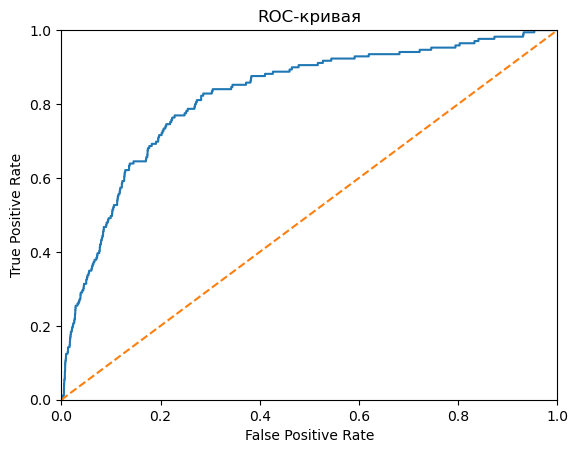

In [16]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [19]:
auc = metrics.roc_auc_score(target_valid, probabilities_one_valid)